In [45]:
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib notebook
#plt.rcParams["font.family"] = "serif"
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

<IPython.core.display.Javascript object>


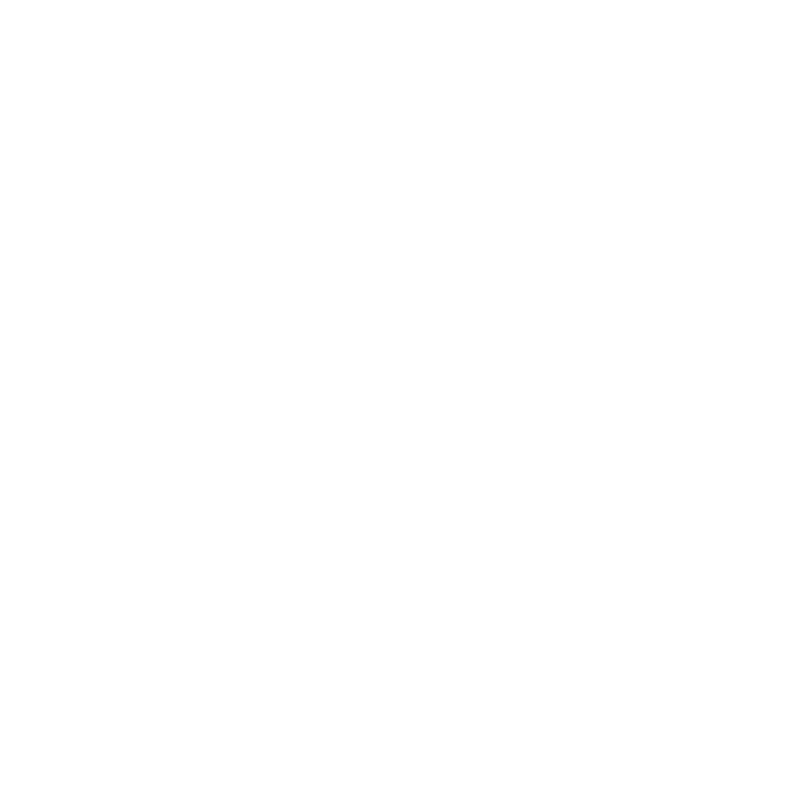

<IPython.core.display.Javascript object>


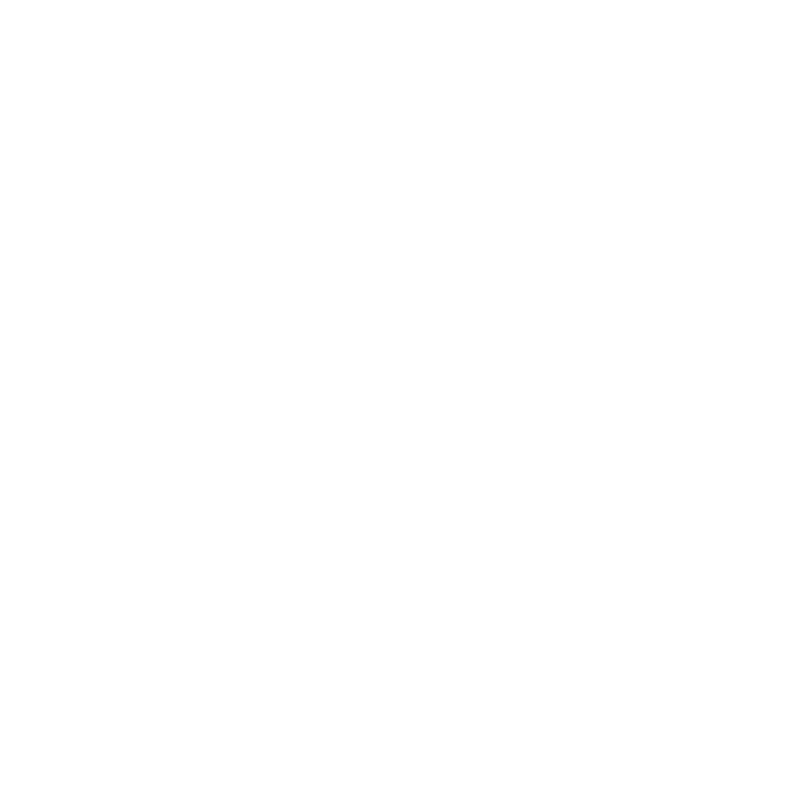

In [46]:
corners = [np.array([0,0]), np.array([1,0]), np.array([0.5, np.sqrt(3)/2])]

def prob2xy(p):
    return np.dot(p, corners)

def proj_on_simplex(mu):
    base1 =  np.array([-1, 1, 0])
    base1 = base1 / np.linalg.norm(base1)
    base2 = np.array([-1/2, -1/2, 1])
    base2 = base2 / np.linalg.norm(base2)

    c1 = np.dot(mu, base1) 
    c2 = np.dot(mu, base2)
    return np.array([c1, c2])

def draw_simplex(ax, **kwargs):
    draw_segment(ax, corners[0], corners[1], color='black', **kwargs)
    draw_segment(ax, corners[0], corners[2], color='black', **kwargs)
    draw_segment(ax, corners[1], corners[2], color='black', **kwargs)

    ax.text(corners[0][0]-0.05, corners[0][1]-0.1,   r' $1$ : $(1, 0, 0)$', fontsize=15)
    ax.text(corners[1][0]-0.05, corners[1][1]-0.1,   r' $2$ : $(0, 1, 0)$', fontsize=15)
    ax.text(corners[2][0], corners[2][1]+0.02,   r' $3$ : $(0, 0, 1)$', fontsize=15)
        
def draw_segment(ax, point1, point2, arrow=False, **kwargs):
    x1, x2 = point1[0], point2[0]
    y1, y2 = point1[1], point2[1]
    if arrow:
        ax.arrow(x1, y1, x2-x1, y2-y1, head_width=0.02, **kwargs)
    else:
        ax.plot([x1, x2], [y1, y2], **kwargs)
        
fig = plt.figure(figsize=(6, 6))
ax = plt.axes()
ax.axis("off")
ax.axis('equal')
#plt.title("Hello")

draw_simplex(ax)

## Probabilities uniformly upper bounded 
$u > 1 / (K-1)$

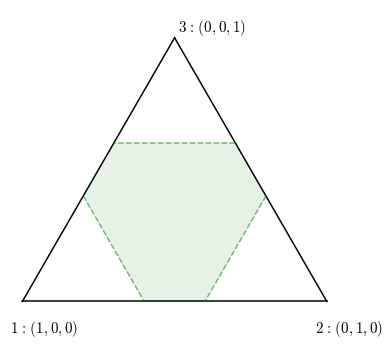

In [29]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes()
ax.axis("off")
ax.axis('equal')

draw_simplex(ax)

up = 0.6 # valid for up > 0.5
low = up

left = prob2xy([low, 0, 1-low])
right = prob2xy([low, 1-low, 0])
draw_segment(ax,left,right, color='green', alpha=0.5, linestyle='--')#, linewidth=0.1)

up = prob2xy([0, low, 1-low])
down = prob2xy([1-low, low, 0])
draw_segment(ax, up,down, color='green', alpha=0.5, linestyle='--')

deep = prob2xy([0, 1-low, low])
shallow = prob2xy([1-low, 0, low])
draw_segment(ax, deep, shallow, color='green', alpha=0.5, linestyle='--')

A = plt.Polygon([left, right, down, up, deep, shallow], True, color='green', alpha=0.1)
ax.add_patch(A)
plt.show()

$1/ K < u < 1 / (K-1)$

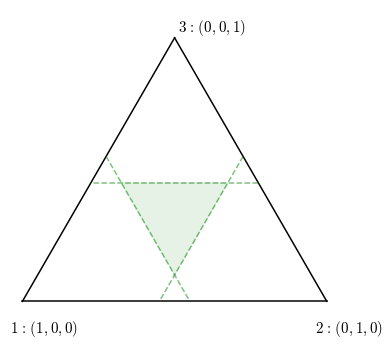

In [21]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes()
ax.axis("off")
ax.axis('equal')
draw_simplex(ax)

up = 0.45
low = up

left = prob2xy([low, 0, 1-low])
right = prob2xy([low, 1-low, 0])
draw_segment(ax, left, right, color='green', alpha=0.5, linestyle='--')

up = prob2xy([0, low, 1-low])
down = prob2xy([1-low, low, 0])
draw_segment(ax, up, down, color='green', alpha=0.5, linestyle='--')

deep = prob2xy([0, 1-low, low])
shallow = prob2xy([1-low, 0, low])
draw_segment(ax, deep, shallow, color='green', alpha=0.5, linestyle='--')


small_corner1 = prob2xy([low, low, 1-2*low])
small_corner2 = prob2xy([low, 1-2*low, low])
small_corner3 = prob2xy([1-2*low, low, low])


A = plt.Polygon([small_corner1, small_corner2, small_corner3], True, color='green', alpha=0.1)
ax.add_patch(A)

## Probabilities uniformly lower bounded 

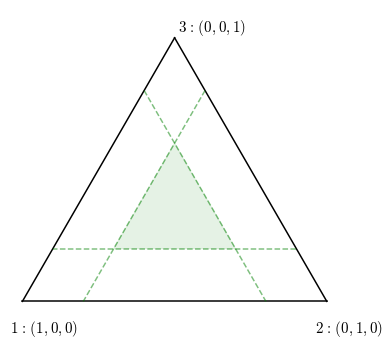

In [30]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes()
ax.axis("off")
ax.axis('equal')
draw_simplex(ax)

low = 0.2

left = prob2xy([low, 0, 1-low])
right = prob2xy([low, 1-low, 0])
draw_segment(ax, left,right, color='green', alpha=0.5, linestyle='--')

up = prob2xy([0, low, 1-low])
down = prob2xy([1-low, low, 0])
draw_segment(ax, up,down, color='green', alpha=0.5, linestyle='--')

deep = prob2xy([0, 1-low, low])
shallow = prob2xy([1-low, 0, low])
draw_segment(ax, deep, shallow, color='green', alpha=0.5, linestyle='--')

small_corner1 = prob2xy([low, low, 1-2*low])
small_corner2 = prob2xy([low, 1-2*low, low])
small_corner3 = prob2xy([1-2*low, low, low])


A = plt.Polygon([small_corner1, small_corner2, small_corner3], True, color='green', alpha=0.1)
ax.add_patch(A)

## Probabilities uniformly lower bounded 

In [41]:
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), gridspec_kw={'width_ratios': [10, 1]})
fig = plt.figure(figsize=(6, 6))


ax = plt.axes()
ax.axis("off")
ax.axis('equal')
draw_simplex(ax)

low = 0.2
left = prob2xy([low, 0, 1-low])
right = prob2xy([low, 1-low, 0])
draw_segment(ax, left,right, color='green', alpha=0.5, linestyle='--')

up = prob2xy([0, low, 1-low])
down = prob2xy([1-low, low, 0])
draw_segment(ax, up,down, color='green', alpha=0.5, linestyle='--')



small_corner1 = prob2xy([1-low, low, 0])
small_corner2 = prob2xy([low, 1-low, 0])
small_corner3 = prob2xy([low, low, 1-2*low])
ax.text(small_corner1[0]-0.06, small_corner1[1]+0.03, r' $p_1$', fontsize=15)
ax.text(small_corner2[0], small_corner2[1]+0.03, r' $p_2$', fontsize=15)
ax.text(small_corner3[0]-0.08, small_corner3[1]+0.00, r' $p_3$', color='red', fontsize=15)

A = plt.Polygon([small_corner1, small_corner2, small_corner3], True, color='green', alpha=0.1)
ax.add_patch(A)


for alpha in [+0.05]:
    mu = np.array([1/2-alpha, 1/3, 1/2+alpha])

    mutilde = proj_on_simplex(mu)

    mil = prob2xy([1/3, 1/3, 1/3])
    draw_segment(ax, mil, mil+mutilde, arrow=True, color='red')

    ax.text(mil[0]-0.08, mil[1]-0.08, r'$P_\Delta(\underline{\mu})$', color='red', fontsize= 15)

#ax.set_xlim([-0.1, 1])
#ax.set_ylim([-0.3, 1.1])

plt.tight_layout()
#plt.savefig('simplex_p3.pdf', format='pdf')

ValueError: 
P_\Delta(\underline{\mu})
         ^
Unknown symbol: \underline (at char 9), (line:1, col:10)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x116533730> (for post_execute):


ValueError: 
P_\Delta(\underline{\mu})
         ^
Unknown symbol: \underline (at char 9), (line:1, col:10)

ValueError: 
P_\Delta(\underline{\mu})
         ^
Unknown symbol: \underline (at char 9), (line:1, col:10)

<Figure size 432x432 with 1 Axes>

# Circle

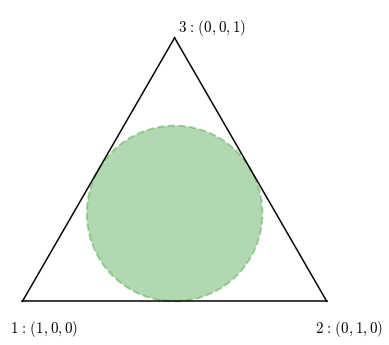

In [32]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes()
ax.axis("off")
ax.axis('equal')

draw_simplex(ax)

alpha = -0.1
mu = np.array([1/2, 1/3, 1/2+alpha])

mil = prob2xy([1/3, 1/3, 1/3])
#draw_segment(ax, mil, mil+np.array([c1, c2]), arrow=True, edgecolor='blue')

r = np.linalg.norm(mil - prob2xy([1/2, 0, 1/2]))


circle1 = plt.Circle((mil[0], mil[1]), r, color='green', alpha=0.3, linestyle='--', linewidth=2)
ax.add_artist(circle1)



#ax.set_xlim([-0.1, 1])
#ax.set_ylim([-0.3, 1.1])

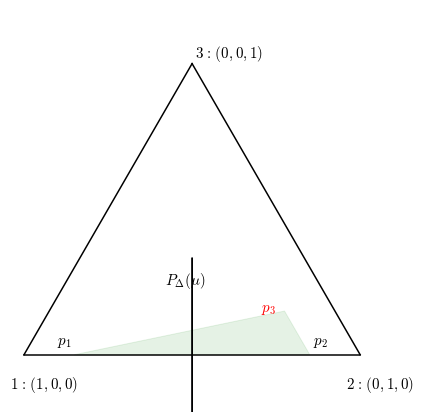

In [39]:
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), gridspec_kw={'width_ratios': [10, 1]})
fig = plt.figure(figsize=(6, 6))


ax = plt.axes()
ax.axis("off")
ax.axis('equal')
draw_simplex(ax)

low = 0.15



small_corner1 = prob2xy([1-low, low, 0])
small_corner2 = prob2xy([low, 1-low, 0])
small_corner3 = prob2xy([low, 1-2*low, low])
ax.text(small_corner1[0]-0.06, small_corner1[1]+0.03, r' $p_1$', fontsize=15)
ax.text(small_corner2[0], small_corner2[1]+0.03, r' $p_2$', fontsize=15)
ax.text(small_corner3[0]-0.08, small_corner3[1]+0.00, r' $p_3$', color='red', fontsize=15)

A = plt.Polygon([small_corner1, small_corner2, small_corner3], True, color='green', alpha=0.1)
ax.add_patch(A)

def draw_mean_vect(mu, **kwargs):
    mutilde = proj_on_simplex(mu)

    mil = prob2xy([1/3, 1/3, 1/3])
    if 'color' in kwargs.keys():
        draw_segment(ax, mil, mil+mutilde, arrow=True, color=kwargs['color'])
    else:
        draw_segment(ax, mil, mil+mutilde, arrow=True)#, color=kwargs['color'])

for alpha in [+0.05]:
    draw_mean_vect(np.array([1, 1, 0]))
    ax.text(mil[0]-0.08, mil[1]-0.08, r'$P_\Delta(\mu)$', color='black', fontsize= 15)

#ax.set_xlim([-0.1, 1])
#ax.set_ylim([-0.3, 1.1])

plt.tight_layout()
#plt.savefig('simplex_p3.pdf', format='pdf')

In [35]:
import ternary

def H(p):
    return np.sum(np.dot(p, np.log(p)))

def tsal_12(p):
    return - 2*np.sum(np.sqrt(p))

def tsal_sym(p):
    return - 2*np.sum(np.sqrt(p)) - 2*np.sum(np.sqrt([1- pi for pi in p]))

def logbarrier(p):
    return - np.sum(np.log(p))

def collision(p):
    return  np.log(np.sum(np.square(p)))

def comp(p):
    x = p[0]
    return abs((np.power(x,(-5/2)) - np.power(1-x, -5/2) )) / np.power(np.power(x, -3/2) + np.power(1-x, -3/2) , 3/2) 

<IPython.core.display.Javascript object>


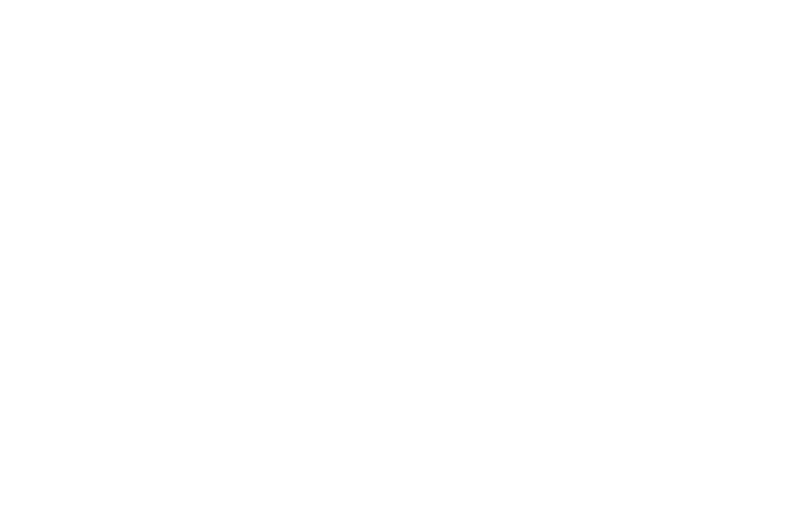

<IPython.core.display.Javascript object>


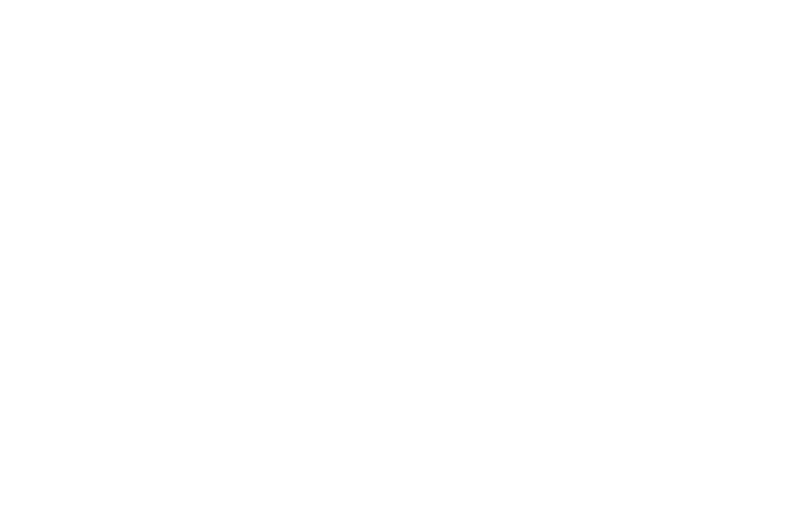

In [44]:
scale = 60
figure, tax = ternary.figure(scale=scale)
tax.heatmapf(tsal_12, boundary=False, style="triangular")
tax.boundary(linewidth=2.0)
tax.set_title("Comparing different regularizers over the simplex")

tax.show()

In [15]:
%matplotlib notebook

In [13]:
np.maximum([0, 1, 3, -10], 0)

array([0, 1, 3, 0])